### Load the initial dataset

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [2]:
releases_data = pd.read_csv('releases.csv')
releases_data.set_index('id', inplace=True)

In [3]:
releases_data.head()

,artist,available,contributors,cover,cover_big,cover_medium,cover_small,cover_xl,duration,error,...,nb_tracks,rating,record_type,release_date,share,title,tracklist,tracks,type,upc
id,,,,,,,,,,,,,,,,,,,,,
77874622.0,{u'picture': u'https://api.deezer.com/artist/1...,True,[{u'picture': u'https://api.deezer.com/artist/...,https://api.deezer.com/album/77874622/image,https://e-cdns-images.dzcdn.net/images/cover/e...,https://e-cdns-images.dzcdn.net/images/cover/e...,https://e-cdns-images.dzcdn.net/images/cover/e...,https://e-cdns-images.dzcdn.net/images/cover/e...,3521.0,NaN,...,16.0,0.0,album,2018-11-09,https://www.deezer.com/album/77874622?utm_sour...,Phoenix,https://api.deezer.com/album/77874622/tracks,{u'data': [{u'title_short': u'Intro (Renaissan...,album,190295531218
77130752.0,{u'picture': u'https://api.deezer.com/artist/1...,True,[{u'picture': u'https://api.deezer.com/artist/...,https://api.deezer.com/album/77130752/image,https://e-cdns-images.dzcdn.net/images/cover/6...,https://e-cdns-images.dzcdn.net/images/cover/6...,https://e-cdns-images.dzcdn.net/images/cover/6...,https://e-cdns-images.dzcdn.net/images/cover/6...,4177.0,NaN,...,18.0,0.0,album,2016-10-14,https://www.deezer.com/album/77130752?utm_sour...,L'Everest (Deluxe Edition),https://api.deezer.com/album/77130752/tracks,"{u'data': [{u'title_short': u'Everest', u'titl...",album,190295518134
77126682.0,{u'picture': u'https://api.deezer.com/artist/1...,True,[{u'picture': u'https://api.deezer.com/artist/...,https://api.deezer.com/album/77126682/image,https://e-cdns-images.dzcdn.net/images/cover/6...,https://e-cdns-images.dzcdn.net/images/cover/6...,https://e-cdns-images.dzcdn.net/images/cover/6...,https://e-cdns-images.dzcdn.net/images/cover/6...,6054.0,NaN,...,28.0,0.0,album,2015-08-21,https://www.deezer.com/album/77126682?utm_sour...,Cosmopolitanie (Deluxe Edition),https://api.deezer.com/album/77126682/tracks,"{u'data': [{u'title_short': u'Préface', u'titl...",album,190295519391
9816130.0,{u'picture': u'https://api.deezer.com/artist/1...,True,[{u'picture': u'https://api.deezer.com/artist/...,https://api.deezer.com/album/9816130/image,https://e-cdns-images.dzcdn.net/images/cover/3...,https://e-cdns-images.dzcdn.net/images/cover/3...,https://e-cdns-images.dzcdn.net/images/cover/3...,https://e-cdns-images.dzcdn.net/images/cover/3...,1753.0,NaN,...,8.0,0.0,album,2015-03-16,https://www.deezer.com/album/9816130?utm_sourc...,Cosmopolitanie (Bonus Tracks),https://api.deezer.com/album/9816130/tracks,"{u'data': [{u'title_short': u'Clown', u'title'...",album,825646119196
1641895.0,{u'picture': u'https://api.deezer.com/artist/1...,True,[{u'picture': u'https://api.deezer.com/artist/...,https://api.deezer.com/album/1641895/image,https://e-cdns-images.dzcdn.net/images/cover/f...,https://e-cdns-images.dzcdn.net/images/cover/f...,https://e-cdns-images.dzcdn.net/images/cover/f...,https://e-cdns-images.dzcdn.net/images/cover/f...,3194.0,NaN,...,12.0,0.0,album,2012-04-30,https://www.deezer.com/album/1641895?utm_sourc...,E=2MC's,https://api.deezer.com/album/1641895/tracks,"{u'data': [{u'title_short': u'Le labo', u'titl...",album,5099962301350


# Crop data while experimenting

And use full data once everything is done

In [4]:
releases_data.shape

(60088, 28)

In [5]:
# releases_data = releases_data.iloc[:1000]
# releases_data.shape

# Brainstorm a list of features

- **album id**
- **artist id**
- **release date**
- **album type**
- **number of tracks**
- **album length**
- **total albums released**
- **days in music industry (since first release)**
- **average artist days to release**
- **days since previous release**
- **genres (aggregated from tracks)**
- albums released during the last year, 2 years, N years...

Also, the target
- **days until the next release**

# Take columns that we want and already have

In [6]:
releases_data.columns

Index([u'artist', u'available', u'contributors', u'cover', u'cover_big',
       u'cover_medium', u'cover_small', u'cover_xl', u'duration', u'error',
       u'explicit_content_cover', u'explicit_content_lyrics',
       u'explicit_lyrics', u'fans', u'genre_id', u'genres', u'label', u'link',
       u'nb_tracks', u'rating', u'record_type', u'release_date', u'share',
       u'title', u'tracklist', u'tracks', u'type', u'upc'],
      dtype='object')

In [7]:
list_of_columns = [
    'title',
    'artist',
    'release_date',
    'record_type',
    'nb_tracks',
    'duration',
    'genres',
    'explicit_lyrics',
]
releases_data[list_of_columns].head()

,title,artist,release_date,record_type,nb_tracks,duration,genres,explicit_lyrics
id,,,,,,,,
77874622.0,Phoenix,{u'picture': u'https://api.deezer.com/artist/1...,2018-11-09,album,16.0,3521.0,{u'data': [{u'picture': u'https://api.deezer.c...,False
77130752.0,L'Everest (Deluxe Edition),{u'picture': u'https://api.deezer.com/artist/1...,2016-10-14,album,18.0,4177.0,{u'data': [{u'picture': u'https://api.deezer.c...,False
77126682.0,Cosmopolitanie (Deluxe Edition),{u'picture': u'https://api.deezer.com/artist/1...,2015-08-21,album,28.0,6054.0,{u'data': [{u'picture': u'https://api.deezer.c...,True
9816130.0,Cosmopolitanie (Bonus Tracks),{u'picture': u'https://api.deezer.com/artist/1...,2015-03-16,album,8.0,1753.0,{u'data': [{u'picture': u'https://api.deezer.c...,False
1641895.0,E=2MC's,{u'picture': u'https://api.deezer.com/artist/1...,2012-04-30,album,12.0,3194.0,{u'data': [{u'picture': u'https://api.deezer.c...,False


In [8]:
df = releases_data[list_of_columns]
df.shape

(60088, 8)

# Check for missing values

In [9]:
df.isnull().sum()

title              6
artist             6
release_date       6
record_type        6
nb_tracks          6
duration           6
genres             6
explicit_lyrics    6
dtype: int64

In [10]:
# df[df.isnull()['title']]

In [11]:
df = df.dropna()

In [12]:
df.isnull().sum()

title              0
artist             0
release_date       0
record_type        0
nb_tracks          0
duration           0
genres             0
explicit_lyrics    0
dtype: int64

In [13]:
# df.shape

# Artist name & id

In [14]:
# artist = df['artist'].iloc[0]
# artist

In [15]:
# artist = artist.replace('"', '\"').replace("u'", '"').replace("',", '",').replace("':", '":').replace("'}", '"}').replace("']", '"]')
# artist

In [16]:
def replace_quotes(string):
    return(string.replace('"', '\\"').replace(" u'", ' "').replace("{u'", '{"').replace("',", '",').replace("':", '":').replace("'}", '"}').replace("']", '"]'))

In [17]:
# s = "{u'picture': u'https://api.deezer.com/artist/1038436/image', u'name': u'Nat \"\"King\"\" Cole Trio', u'picture_medium': u'https://e-cdns-images.dzcdn.net/images/artist//250x250-000000-80-0-0.jpg', u'type': u'artist', u'picture_small': u'https://e-cdns-images.dzcdn.net/images/artist//56x56-000000-80-0-0.jpg', u'picture_xl': u'https://e-cdns-images.dzcdn.net/images/artist//1000x1000-000000-80-0-0.jpg', u'tracklist': u'https://api.deezer.com/artist/1038436/top?limit=50', u'id': 1038436, u'picture_big': u'https://e-cdns-images.dzcdn.net/images/artist//500x500-000000-80-0-0.jpg'}"
# replace_quotes(s)
# replace_quotes('{"picture": "https://api.deezer.com/artist/211347/image", "name": "Gur"s Jazzmatazz", "picture_medium": "https://e-cdns-images.dzcdn.net/images/artist/1a7a7785791b4cca9fd3a9ed10bc23f0/250x250-000000-80-0-0.jpg", "type": "artist", "picture_small": "https://e-cdns-images.dzcdn.net/images/artist/1a7a7785791b4cca9fd3a9ed10bc23f0/56x56-000000-80-0-0.jpg", "picture_xl": "https://e-cdns-images.dzcdn.net/images/artist/1a7a7785791b4cca9fd3a9ed10bc23f0/1000x1000-000000-80-0-0.jpg", "tracklist": "https://api.deezer.com/artist/211347/top?limit=50", "id": 211347, "picture_big": "https://e-cdns-images.dzcdn.net/images/artist/1a7a7785791b4cca9fd3a9ed10bc23f0/500x500-000000-80-0-0.jpg"}')

In [18]:
# json.loads(replace_quotes(s))

In [19]:
# artist_json = json.loads(artist)
# artist_json

In [20]:
# artist_json['name']

In [21]:
# artist_json['id']

In [22]:
# df['artist'].head().apply(replace_quotes)

In [23]:
# df['artist'].head().apply(replace_quotes).apply(json.loads)

In [24]:
def artist_name(artist_json):
    return(artist_json['name'])
# artist_name(artist_json)

In [25]:
artist_jsons = df['artist'].apply(replace_quotes).apply(json.loads)

In [26]:
artist_jsons.head().apply(artist_name)

id
77874622.0    Soprano
77130752.0    Soprano
77126682.0    Soprano
9816130.0     Soprano
1641895.0     Soprano
Name: artist, dtype: object

In [27]:
df.insert(1, 'artist_name', artist_jsons.apply(artist_name))
df.head()

,title,artist_name,artist,release_date,record_type,nb_tracks,duration,genres,explicit_lyrics
id,,,,,,,,,
77874622.0,Phoenix,Soprano,{u'picture': u'https://api.deezer.com/artist/1...,2018-11-09,album,16.0,3521.0,{u'data': [{u'picture': u'https://api.deezer.c...,False
77130752.0,L'Everest (Deluxe Edition),Soprano,{u'picture': u'https://api.deezer.com/artist/1...,2016-10-14,album,18.0,4177.0,{u'data': [{u'picture': u'https://api.deezer.c...,False
77126682.0,Cosmopolitanie (Deluxe Edition),Soprano,{u'picture': u'https://api.deezer.com/artist/1...,2015-08-21,album,28.0,6054.0,{u'data': [{u'picture': u'https://api.deezer.c...,True
9816130.0,Cosmopolitanie (Bonus Tracks),Soprano,{u'picture': u'https://api.deezer.com/artist/1...,2015-03-16,album,8.0,1753.0,{u'data': [{u'picture': u'https://api.deezer.c...,False
1641895.0,E=2MC's,Soprano,{u'picture': u'https://api.deezer.com/artist/1...,2012-04-30,album,12.0,3194.0,{u'data': [{u'picture': u'https://api.deezer.c...,False


In [28]:
def artist_id(artist_json):
    return(artist_json['id'])
# artist_id(artist_json)

In [29]:
artist_jsons.head().apply(artist_id)

id
77874622.0    13011
77130752.0    13011
77126682.0    13011
9816130.0     13011
1641895.0     13011
Name: artist, dtype: int64

In [30]:
df.insert(2, 'artist_id', artist_jsons.apply(artist_id))
df.head()

,title,artist_name,artist_id,artist,release_date,record_type,nb_tracks,duration,genres,explicit_lyrics
id,,,,,,,,,,
77874622.0,Phoenix,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2018-11-09,album,16.0,3521.0,{u'data': [{u'picture': u'https://api.deezer.c...,False
77130752.0,L'Everest (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2016-10-14,album,18.0,4177.0,{u'data': [{u'picture': u'https://api.deezer.c...,False
77126682.0,Cosmopolitanie (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-08-21,album,28.0,6054.0,{u'data': [{u'picture': u'https://api.deezer.c...,True
9816130.0,Cosmopolitanie (Bonus Tracks),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-03-16,album,8.0,1753.0,{u'data': [{u'picture': u'https://api.deezer.c...,False
1641895.0,E=2MC's,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2012-04-30,album,12.0,3194.0,{u'data': [{u'picture': u'https://api.deezer.c...,False


# Release date to datetime conversion

In [31]:
df[df['release_date'] < '1900-01-01']

,title,artist_name,artist_id,artist,release_date,record_type,nb_tracks,duration,genres,explicit_lyrics
id,,,,,,,,,,
14123064.0,NYC,Chris Lake,11799,{u'picture': u'https://api.deezer.com/artist/1...,0011-09-03,single,2.0,768.0,{u'data': [{u'picture': u'https://api.deezer.c...,False
4551621.0,Unhappy Ending Dream,Unique,13675,{u'picture': u'https://api.deezer.com/artist/1...,0000-00-00,ep,7.0,2532.0,{u'data': []},False
4551611.0,Hiszed vagy sem,Unique,13675,{u'picture': u'https://api.deezer.com/artist/1...,0000-00-00,ep,7.0,2532.0,{u'data': []},False


In [32]:
df = df[df['release_date'] > '1900-01-01']

In [33]:
df.loc[:, 'release_date'] = pd.to_datetime(df['release_date']).dt.date
df.head()

,title,artist_name,artist_id,artist,release_date,record_type,nb_tracks,duration,genres,explicit_lyrics
id,,,,,,,,,,
77874622.0,Phoenix,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2018-11-09,album,16.0,3521.0,{u'data': [{u'picture': u'https://api.deezer.c...,False
77130752.0,L'Everest (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2016-10-14,album,18.0,4177.0,{u'data': [{u'picture': u'https://api.deezer.c...,False
77126682.0,Cosmopolitanie (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-08-21,album,28.0,6054.0,{u'data': [{u'picture': u'https://api.deezer.c...,True
9816130.0,Cosmopolitanie (Bonus Tracks),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-03-16,album,8.0,1753.0,{u'data': [{u'picture': u'https://api.deezer.c...,False
1641895.0,E=2MC's,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2012-04-30,album,12.0,3194.0,{u'data': [{u'picture': u'https://api.deezer.c...,False


# Days in music industry (since first release)

In [34]:
# df.groupby('artist_id').count().head(10)

In [35]:
# df[df['artist_id'] == 9].sort_values('release_date')

In [36]:
# first_album = df.loc[1206022]
# first_album

In [37]:
# album = first_album

In [38]:
def days_since_first_release(album):
    artist_id = album.artist_id
    artist_albums = df[df['artist_id'] == artist_id].sort_values('release_date')

    album_release_date = album.release_date

    albums_previously_released = artist_albums[artist_albums['release_date'] <= album_release_date]
    first_album = albums_previously_released.head(1)
    first_album_release_date = first_album.release_date.values[0]

    date_difference = album_release_date - first_album_release_date
    return(date_difference.days)

In [39]:
# the first album from the artist
# days_since_first_release(first_album)

In [40]:
# last_album = df.loc[1454443]

In [41]:
# the last album from the artist in our dataset
# days_since_first_release(last_album)

In [42]:
df.head(10).apply(days_since_first_release, axis=1)

id
77874622.0    4420
77130752.0    3664
77126682.0    3244
9816130.0     3086
1641895.0     2036
1523930.0     1963
40632261.0    1625
301745.0       542
77133732.0     136
1252759.0        0
dtype: int64

In [43]:
df.loc[:, 'days_since_first_release'] = df.apply(days_since_first_release, axis=1)

In [44]:
df.head()

,title,artist_name,artist_id,artist,release_date,record_type,nb_tracks,duration,genres,explicit_lyrics,days_since_first_release
id,,,,,,,,,,,
77874622.0,Phoenix,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2018-11-09,album,16.0,3521.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,4420
77130752.0,L'Everest (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2016-10-14,album,18.0,4177.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,3664
77126682.0,Cosmopolitanie (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-08-21,album,28.0,6054.0,{u'data': [{u'picture': u'https://api.deezer.c...,True,3244
9816130.0,Cosmopolitanie (Bonus Tracks),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-03-16,album,8.0,1753.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,3086
1641895.0,E=2MC's,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2012-04-30,album,12.0,3194.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,2036


# Total albums released

In [45]:
def total_albums_released(album):
    artist_id = album.artist_id
    artist_albums = df[df['artist_id'] == artist_id].sort_values('release_date')

    album_release_date = album.release_date
    albums_previously_released = artist_albums[artist_albums['release_date'] <= album.release_date]
    return(albums_previously_released.shape[0])

In [46]:
# the first album from the artist
# total_albums_released(first_album)

In [47]:
# the last album from the artist in our dataset
# total_albums_released(last_album)

In [48]:
df.head(10).apply(total_albums_released, axis=1)

id
77874622.0    12
77130752.0    11
77126682.0    10
9816130.0      9
1641895.0      8
1523930.0      7
40632261.0     6
301745.0       3
77133732.0     2
1252759.0      1
dtype: int64

In [49]:
df['total_albums_released'] = df.apply(total_albums_released, axis=1)

In [50]:
df.head()

,title,artist_name,artist_id,artist,release_date,record_type,nb_tracks,duration,genres,explicit_lyrics,days_since_first_release,total_albums_released
id,,,,,,,,,,,,
77874622.0,Phoenix,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2018-11-09,album,16.0,3521.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,4420,12
77130752.0,L'Everest (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2016-10-14,album,18.0,4177.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,3664,11
77126682.0,Cosmopolitanie (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-08-21,album,28.0,6054.0,{u'data': [{u'picture': u'https://api.deezer.c...,True,3244,10
9816130.0,Cosmopolitanie (Bonus Tracks),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-03-16,album,8.0,1753.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,3086,9
1641895.0,E=2MC's,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2012-04-30,album,12.0,3194.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,2036,8


# Drop old releases

In [51]:
df.shape

(60077, 12)

In [52]:
df[pd.to_datetime(df['release_date']).dt.year >= 2004].shape

(51229, 12)

In [53]:
df = df[pd.to_datetime(df['release_date']).dt.year >= 2004]
df.shape

(51229, 12)

# Features from date

## Year

In [54]:
pd.to_datetime(df.head()['release_date']).dt.year

id
77874622.0    2018
77130752.0    2016
77126682.0    2015
9816130.0     2015
1641895.0     2012
Name: release_date, dtype: int64

In [55]:
df.loc[:, 'release_year'] = pd.to_datetime(df['release_date']).dt.year

In [56]:
df.head()

,title,artist_name,artist_id,artist,release_date,record_type,nb_tracks,duration,genres,explicit_lyrics,days_since_first_release,total_albums_released,release_year
id,,,,,,,,,,,,,
77874622.0,Phoenix,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2018-11-09,album,16.0,3521.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,4420,12,2018
77130752.0,L'Everest (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2016-10-14,album,18.0,4177.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,3664,11,2016
77126682.0,Cosmopolitanie (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-08-21,album,28.0,6054.0,{u'data': [{u'picture': u'https://api.deezer.c...,True,3244,10,2015
9816130.0,Cosmopolitanie (Bonus Tracks),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-03-16,album,8.0,1753.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,3086,9,2015
1641895.0,E=2MC's,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2012-04-30,album,12.0,3194.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,2036,8,2012


(array([7.7450e+03, 1.0472e+04, 1.3923e+04, 1.9088e+04, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2004.        , 2007.88888889, 2011.77777778, 2015.66666667,
        2019.55555556, 2023.44444444, 2027.33333333, 2031.22222222,
        2035.11111111, 2039.        ]),
 <a list of 9 Patch objects>)

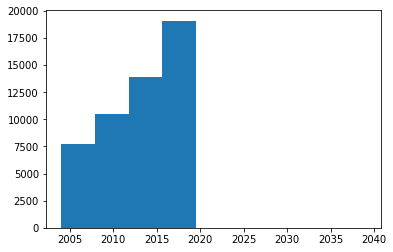

In [57]:
plt.hist(df['release_year'].values, bins=9)

In [58]:
df[df['release_year'] >= 2020]

,title,artist_name,artist_id,artist,release_date,record_type,nb_tracks,duration,genres,explicit_lyrics,days_since_first_release,total_albums_released,release_year
id,,,,,,,,,,,,,
240196.0,Montell Jordan,Montell Jordan,258,{u'picture': u'https://api.deezer.com/artist/2...,2039-12-31,album,13.0,3410.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,16340,16,2039


We can't know for sure that this album will be released in the future so it's better to drop it

In [59]:
df.drop(df[df['release_year'] > 2020].index, inplace=True)

In [60]:
df[df['release_year'] > 2020]

,title,artist_name,artist_id,artist,release_date,record_type,nb_tracks,duration,genres,explicit_lyrics,days_since_first_release,total_albums_released,release_year
id,,,,,,,,,,,,,


(array([1318., 1990., 2175., 2262., 2423., 2635., 2601., 2813., 2970.,
        3285., 3638., 4030., 4440., 5049., 6242., 3357.]),
 array([2004.    , 2004.9375, 2005.875 , 2006.8125, 2007.75  , 2008.6875,
        2009.625 , 2010.5625, 2011.5   , 2012.4375, 2013.375 , 2014.3125,
        2015.25  , 2016.1875, 2017.125 , 2018.0625, 2019.    ]),
 <a list of 16 Patch objects>)

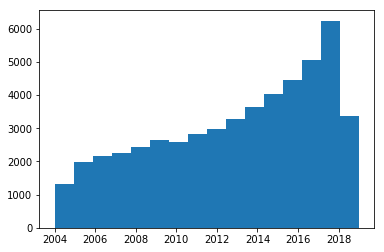

In [61]:
plt.hist(df['release_year'].values, bins=16)

## Month

In [62]:
pd.to_datetime(df.head()['release_date']).dt.month

id
77874622.0    11
77130752.0    10
77126682.0     8
9816130.0      3
1641895.0      4
Name: release_date, dtype: int64

In [63]:
df.loc[:, 'release_month'] = pd.to_datetime(df['release_date']).dt.month

In [64]:
df.head()

,title,artist_name,artist_id,artist,release_date,record_type,nb_tracks,duration,genres,explicit_lyrics,days_since_first_release,total_albums_released,release_year,release_month
id,,,,,,,,,,,,,,
77874622.0,Phoenix,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2018-11-09,album,16.0,3521.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,4420,12,2018,11
77130752.0,L'Everest (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2016-10-14,album,18.0,4177.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,3664,11,2016,10
77126682.0,Cosmopolitanie (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-08-21,album,28.0,6054.0,{u'data': [{u'picture': u'https://api.deezer.c...,True,3244,10,2015,8
9816130.0,Cosmopolitanie (Bonus Tracks),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-03-16,album,8.0,1753.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,3086,9,2015,3
1641895.0,E=2MC's,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2012-04-30,album,12.0,3194.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,2036,8,2012,4


(array([4400., 3821., 4936., 4560., 4694., 4130., 3817., 3744., 4508.,
        4656., 4633., 3329.]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <a list of 12 Patch objects>)

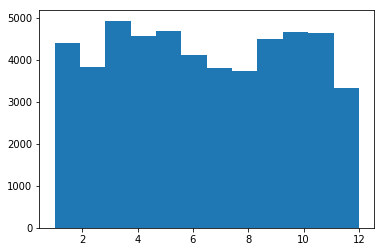

In [65]:
plt.hist(df['release_month'].values, bins=12)

## Day of month

In [66]:
pd.to_datetime(df.head()['release_date']).dt.day

id
77874622.0     9
77130752.0    14
77126682.0    21
9816130.0     16
1641895.0     30
Name: release_date, dtype: int64

In [67]:
df.loc[:, 'release_day_of_month'] = pd.to_datetime(df['release_date']).dt.day

In [68]:
df.head()

,title,artist_name,artist_id,artist,release_date,record_type,nb_tracks,duration,genres,explicit_lyrics,days_since_first_release,total_albums_released,release_year,release_month,release_day_of_month
id,,,,,,,,,,,,,,,
77874622.0,Phoenix,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2018-11-09,album,16.0,3521.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,4420,12,2018,11,9
77130752.0,L'Everest (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2016-10-14,album,18.0,4177.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,3664,11,2016,10,14
77126682.0,Cosmopolitanie (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-08-21,album,28.0,6054.0,{u'data': [{u'picture': u'https://api.deezer.c...,True,3244,10,2015,8,21
9816130.0,Cosmopolitanie (Bonus Tracks),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-03-16,album,8.0,1753.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,3086,9,2015,3,16
1641895.0,E=2MC's,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2012-04-30,album,12.0,3194.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,2036,8,2012,4,30


(array([3788., 1567., 1571., 1454., 1544., 1392., 1517., 1591., 1639.,
        1814., 1509., 1588., 1525., 1639., 1789., 1636., 1720., 1523.,
        1621., 1804., 1630., 1763., 1591., 1656., 1674., 1626., 1458.,
        1607., 1567., 2425.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31.]),
 <a list of 30 Patch objects>)

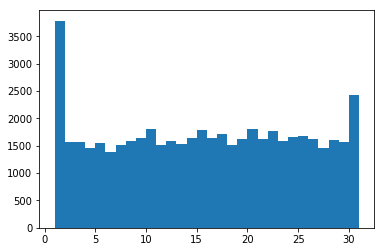

In [69]:
plt.hist(df['release_day_of_month'].values, bins=30)

Seems like there are 2 peaks on 1st and on 31st days of month. I'm not sure if it's something that artists do or is this Deezer filling missing values.  
Let's plot the 

(array([1142.,  230.,  267.,  276.,  200.,  234.,  236.,  151.,  229.,
         287.,  279.,  257.]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <a list of 12 Patch objects>)

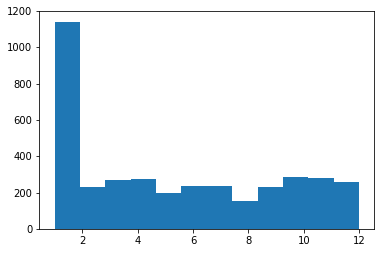

In [70]:
plt.hist(df[df['release_day_of_month'] == 1]['release_month'].values, bins=12)

(array([118.,   0., 176.,   0., 105.,   0., 126., 177.,   0., 131.,   0.,
         61.]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <a list of 12 Patch objects>)

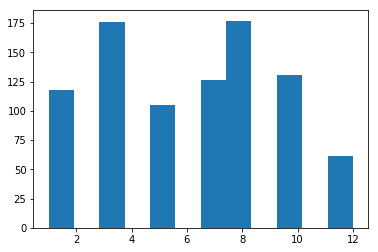

In [71]:
plt.hist(df[df['release_day_of_month'] == 31]['release_month'].values, bins=12)

Looks like 31st is a normal day that people release on, but 1st is something that is filled be Deezer.

(array([223., 129., 131., 144.,  96.,  57.,  32.,  36., 155.,  32.,  20.,
         87.]),
 array([2004.  , 2005.25, 2006.5 , 2007.75, 2009.  , 2010.25, 2011.5 ,
        2012.75, 2014.  , 2015.25, 2016.5 , 2017.75, 2019.  ]),
 <a list of 12 Patch objects>)

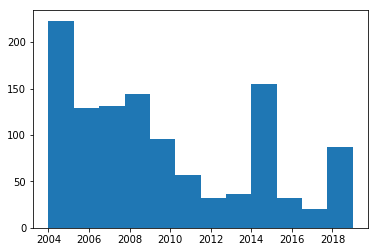

In [72]:
plt.hist(df[(df['release_day_of_month'] == 1) & (df['release_month'] == 1)]['release_year'].values, bins=12)

## Day of week

In [73]:
pd.to_datetime(df.head()['release_date']).dt.dayofweek

id
77874622.0    4
77130752.0    4
77126682.0    4
9816130.0     0
1641895.0     0
Name: release_date, dtype: int64

In [74]:
df.loc[:, 'release_day_of_week'] = pd.to_datetime(df['release_date']).dt.dayofweek

In [75]:
df.head()

,title,artist_name,artist_id,artist,release_date,record_type,nb_tracks,duration,genres,explicit_lyrics,days_since_first_release,total_albums_released,release_year,release_month,release_day_of_month,release_day_of_week
id,,,,,,,,,,,,,,,,
77874622.0,Phoenix,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2018-11-09,album,16.0,3521.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,4420,12,2018,11,9,4
77130752.0,L'Everest (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2016-10-14,album,18.0,4177.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,3664,11,2016,10,14,4
77126682.0,Cosmopolitanie (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-08-21,album,28.0,6054.0,{u'data': [{u'picture': u'https://api.deezer.c...,True,3244,10,2015,8,21,4
9816130.0,Cosmopolitanie (Bonus Tracks),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-03-16,album,8.0,1753.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,3086,9,2015,3,16,0
1641895.0,E=2MC's,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2012-04-30,album,12.0,3194.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,2036,8,2012,4,30,0


(array([11337., 10160.,  3988.,  4151., 17783.,  1784.,  2025.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <a list of 7 Patch objects>)

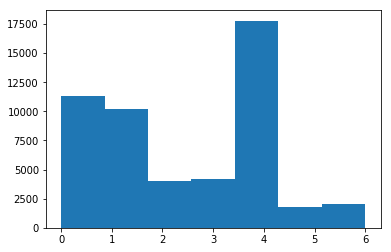

In [76]:
plt.hist(df['release_day_of_week'].values, bins=7)

Seems like there is a clear winner at 4 (Friday). This is because Friday is an International Release Day.  
But are Sunday and Monday this popular of a release day or are they just used to be.

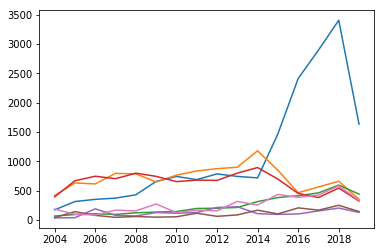

In [77]:
years = df.groupby(['release_year']).count()['release_day_of_week'].index.values
# total_over_years = df.groupby(['release_year']).count().astype(float)
# total_over_years

days_of_week = df['release_day_of_week'].unique()
for day_of_week in days_of_week:
    day_of_week_data = df[df['release_day_of_week'] == day_of_week].groupby(['release_year']).count()# / total_over_years
    day_of_week_data = day_of_week_data.reindex(years, fill_value=0)['title'].values
    plt.plot(years, day_of_week_data, label=str(day_of_week))

# Release type

In [78]:
record_types = df['record_type'].unique()
record_types

array(['album', 'single', 'compile', 'ep', 'bundle'], dtype=object)

Albums, singles, and EPs are types of releases where and artist creates new content.  
But compiles and bundles is just a compilation of previously released tracks.  
Since we're only interested in predicting next new piece of content let's drop compiles and bundles.

In [79]:
df.drop(df[(df['record_type'] == 'compile') | (df['record_type'] == 'bundle')].index, inplace=True)

In [80]:
df.shape

(50244, 16)

In [81]:
record_types = df['record_type'].unique()
record_types

array(['album', 'single', 'ep'], dtype=object)

In [82]:
for record_type in record_types:
    df['record_type_' + record_type] = (df['record_type'] == record_type).astype(int)
df.head()

,title,artist_name,artist_id,artist,release_date,record_type,nb_tracks,duration,genres,explicit_lyrics,days_since_first_release,total_albums_released,release_year,release_month,release_day_of_month,release_day_of_week,record_type_album,record_type_single,record_type_ep
id,,,,,,,,,,,,,,,,,,,
77874622.0,Phoenix,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2018-11-09,album,16.0,3521.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,4420,12,2018,11,9,4,1,0,0
77130752.0,L'Everest (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2016-10-14,album,18.0,4177.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,3664,11,2016,10,14,4,1,0,0
77126682.0,Cosmopolitanie (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-08-21,album,28.0,6054.0,{u'data': [{u'picture': u'https://api.deezer.c...,True,3244,10,2015,8,21,4,1,0,0
9816130.0,Cosmopolitanie (Bonus Tracks),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-03-16,album,8.0,1753.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,3086,9,2015,3,16,0,1,0,0
1641895.0,E=2MC's,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2012-04-30,album,12.0,3194.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,2036,8,2012,4,30,0,1,0,0


# Target (days until the next release)

In [83]:
# pd.to_datetime(df['release_date']).dt.date.head()

In [84]:
# min(df['release_date'])

In [85]:
# max(df['release_date'])

In [86]:
# artist_id = album.artist_id
# artist_id

In [87]:
# artist_albums = df[df['artist_id'] == artist_id].sort_values('release_date')
# artist_albums

In [88]:
# release_date = album.release_date
# release_date

In [89]:
# next_album = artist_albums[artist_albums['release_date'] > release_date].head(1)
# next_album

In [90]:
# next_album_release_date = next_album.release_date.values[0]
# next_album_release_date

In [91]:
# date_difference = next_album_release_date - release_date
# date_difference

In [92]:
# date_difference.days

In [93]:
# date_difference.days.__class__

In [94]:
def days_until_next_release(album):
    artist_id = album.artist_id
    artist_albums = df[df['artist_id'] == artist_id].sort_values('release_date')

    album_release_date = album.release_date

    next_album = artist_albums[artist_albums['release_date'] > album_release_date].head(1)
    if len(next_album) == 0:
        return(None)
    else:
        next_album_release_date = next_album.release_date.values
        next_album_release_date = next_album_release_date[0]
        date_difference = next_album_release_date - album_release_date
        return(date_difference.days)

In [95]:
# days_until_next_release(album)

In [96]:
# the last album from the artist
# days_until_next_release(last_album)

In [97]:
df.head(10).apply(days_until_next_release, axis=1)

id
77874622.0       NaN
77130752.0     756.0
77126682.0     420.0
9816130.0      158.0
1641895.0     1050.0
1523930.0       73.0
40632261.0     338.0
301745.0       147.0
77133732.0     406.0
1252759.0        NaN
dtype: float64

In [98]:
df['days_until_next_album'] = df.apply(days_until_next_release, axis=1)

In [99]:
df.head()

,title,artist_name,artist_id,artist,release_date,record_type,nb_tracks,duration,genres,explicit_lyrics,days_since_first_release,total_albums_released,release_year,release_month,release_day_of_month,release_day_of_week,record_type_album,record_type_single,record_type_ep,days_until_next_album
id,,,,,,,,,,,,,,,,,,,,
77874622.0,Phoenix,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2018-11-09,album,16.0,3521.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,4420,12,2018,11,9,4,1,0,0,NaN
77130752.0,L'Everest (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2016-10-14,album,18.0,4177.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,3664,11,2016,10,14,4,1,0,0,756.0
77126682.0,Cosmopolitanie (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-08-21,album,28.0,6054.0,{u'data': [{u'picture': u'https://api.deezer.c...,True,3244,10,2015,8,21,4,1,0,0,420.0
9816130.0,Cosmopolitanie (Bonus Tracks),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-03-16,album,8.0,1753.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,3086,9,2015,3,16,0,1,0,0,158.0
1641895.0,E=2MC's,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2012-04-30,album,12.0,3194.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,2036,8,2012,4,30,0,1,0,0,1050.0


In [100]:
# final test
# df[df['artist_id'] == artist_id].sort_values('release_date')

In [101]:
df.shape

(50244, 20)

In [102]:
# clean up all rows without the next release
# since they don't give us any information we can act on
df = df.dropna(subset=['days_until_next_album'])
df.shape

(45049, 20)

(array([2.8756e+04, 5.9910e+03, 3.3670e+03, 2.0860e+03, 1.4340e+03,
        8.9600e+02, 6.2800e+02, 4.8900e+02, 3.1100e+02, 2.2100e+02,
        1.6600e+02, 1.6800e+02, 1.2000e+02, 6.7000e+01, 6.0000e+01,
        6.6000e+01, 4.4000e+01, 2.9000e+01, 3.2000e+01, 1.9000e+01,
        1.9000e+01, 2.2000e+01, 2.0000e+01, 9.0000e+00, 1.1000e+01,
        1.0000e+01, 2.0000e+00, 1.0000e+00, 4.0000e+00, 1.0000e+00]),
 array([1.00000000e+00, 1.75433333e+02, 3.49866667e+02, 5.24300000e+02,
        6.98733333e+02, 8.73166667e+02, 1.04760000e+03, 1.22203333e+03,
        1.39646667e+03, 1.57090000e+03, 1.74533333e+03, 1.91976667e+03,
        2.09420000e+03, 2.26863333e+03, 2.44306667e+03, 2.61750000e+03,
        2.79193333e+03, 2.96636667e+03, 3.14080000e+03, 3.31523333e+03,
        3.48966667e+03, 3.66410000e+03, 3.83853333e+03, 4.01296667e+03,
        4.18740000e+03, 4.36183333e+03, 4.53626667e+03, 4.71070000e+03,
        4.88513333e+03, 5.05956667e+03, 5.23400000e+03]),
 <a list of 30 Patch objects

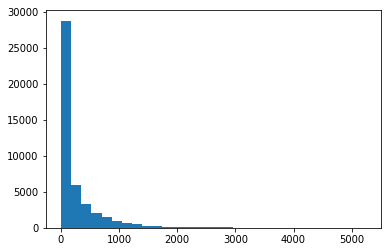

In [103]:
plt.hist(df['days_until_next_album'].values, bins=30)

In [104]:
df[df['days_until_next_album'] > 10000]

,title,artist_name,artist_id,artist,release_date,record_type,nb_tracks,duration,genres,explicit_lyrics,days_since_first_release,total_albums_released,release_year,release_month,release_day_of_month,release_day_of_week,record_type_album,record_type_single,record_type_ep,days_until_next_album
id,,,,,,,,,,,,,,,,,,,,


# Releases in the last N days

In [105]:
def albums_released_in(album, days_from, days_to):
    artist_id = album.artist_id
    artist_albums = df[df['artist_id'] == artist_id]#.sort_values('release_date')

    date_from = album.release_date - datetime.timedelta(days=days_from)
    date_to = album.release_date - datetime.timedelta(days=days_to)

    albums_previously_released = artist_albums[(artist_albums['release_date'] < date_to) & (artist_albums['release_date'] >= date_from)]
    return(albums_previously_released.shape[0])

In [106]:
def albums_released_in_30_days(album):
    return(albums_released_in(album, 0, 30))

def albums_released_in_30_60_days(album):
    return(albums_released_in(album, 30, 60))

def albums_released_in_60_90_days(album):
    return(albums_released_in(album, 60, 90))

def albums_released_in_90_180_days(album):
    return(albums_released_in(album, 90, 180))

def albums_released_in_180_360_days(album):
    return(albums_released_in(album, 180, 360))

def albums_released_in_360_720_days(album):
    return(albums_released_in(album, 360, 720))

In [107]:
# df.head(10).apply(albums_released_in_30_days, axis=1)

In [108]:
df['albums_released_in_30_days'] = df.apply(albums_released_in_30_days, axis=1)

In [109]:
df['albums_released_in_30_60_days'] = df.apply(albums_released_in_30_60_days, axis=1)

In [110]:
df['albums_released_in_60_90_days'] = df.apply(albums_released_in_60_90_days, axis=1)

In [111]:
df['albums_released_in_90_180_days'] = df.apply(albums_released_in_90_180_days, axis=1)

In [112]:
df['albums_released_in_180_360_days'] = df.apply(albums_released_in_180_360_days, axis=1)

In [113]:
df['albums_released_in_360_720_days'] = df.apply(albums_released_in_360_720_days, axis=1)

In [114]:
df.head()

,title,artist_name,artist_id,artist,release_date,record_type,nb_tracks,duration,genres,explicit_lyrics,...,record_type_album,record_type_single,record_type_ep,days_until_next_album,albums_released_in_30_days,albums_released_in_30_60_days,albums_released_in_60_90_days,albums_released_in_90_180_days,albums_released_in_180_360_days,albums_released_in_360_720_days
id,,,,,,,,,,,,,,,,,,,,,
77130752.0,L'Everest (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2016-10-14,album,18.0,4177.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,1,0,0,756.0,0,0,0,0,0,0
77126682.0,Cosmopolitanie (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-08-21,album,28.0,6054.0,{u'data': [{u'picture': u'https://api.deezer.c...,True,...,1,0,0,420.0,0,0,0,0,0,0
9816130.0,Cosmopolitanie (Bonus Tracks),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-03-16,album,8.0,1753.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,1,0,0,158.0,0,0,0,0,0,0
1641895.0,E=2MC's,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2012-04-30,album,12.0,3194.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,1,0,0,1050.0,0,0,0,0,0,0
1523930.0,E.P. Live 2012,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2012-02-17,album,4.0,922.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,1,0,0,73.0,0,0,0,0,0,0


# Days since previous release

In [115]:
def days_since_prev_release(album):
    artist_id = album.artist_id
    artist_albums = df[df['artist_id'] == artist_id].sort_values('release_date', ascending=False)

    album_release_date = album.release_date

    previous_album = artist_albums[artist_albums['release_date'] < album_release_date].head(1)
    if len(previous_album) == 0:
        return(None)
    else:
        prev_album_release_date = previous_album.release_date.values[0]
        date_difference = album_release_date - prev_album_release_date
        return(date_difference.days)

In [116]:
# the first album from the artist
# days_since_prev_release(first_album)

In [117]:
# the last album from the artist in our dataset
# days_since_prev_release(last_album)

In [118]:
df.head(10).apply(days_since_prev_release, axis=1)

id
77130752.0     420.0
77126682.0     158.0
9816130.0     1050.0
1641895.0       73.0
1523930.0      338.0
40632261.0     682.0
301745.0       406.0
77133732.0     136.0
6141022.0        NaN
311650.0       147.0
dtype: float64

In [119]:
df['days_since_previous_release'] = df.apply(days_since_prev_release, axis=1)

In [120]:
df.head()

,title,artist_name,artist_id,artist,release_date,record_type,nb_tracks,duration,genres,explicit_lyrics,...,record_type_single,record_type_ep,days_until_next_album,albums_released_in_30_days,albums_released_in_30_60_days,albums_released_in_60_90_days,albums_released_in_90_180_days,albums_released_in_180_360_days,albums_released_in_360_720_days,days_since_previous_release
id,,,,,,,,,,,,,,,,,,,,,
77130752.0,L'Everest (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2016-10-14,album,18.0,4177.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,0,0,756.0,0,0,0,0,0,0,420.0
77126682.0,Cosmopolitanie (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-08-21,album,28.0,6054.0,{u'data': [{u'picture': u'https://api.deezer.c...,True,...,0,0,420.0,0,0,0,0,0,0,158.0
9816130.0,Cosmopolitanie (Bonus Tracks),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-03-16,album,8.0,1753.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,0,0,158.0,0,0,0,0,0,0,1050.0
1641895.0,E=2MC's,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2012-04-30,album,12.0,3194.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,0,0,1050.0,0,0,0,0,0,0,73.0
1523930.0,E.P. Live 2012,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2012-02-17,album,4.0,922.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,0,0,73.0,0,0,0,0,0,0,338.0


In [121]:
df.isnull().sum()

title                                 0
artist_name                           0
artist_id                             0
artist                                0
release_date                          0
record_type                           0
nb_tracks                             0
duration                              0
genres                                0
explicit_lyrics                       0
days_since_first_release              0
total_albums_released                 0
release_year                          0
release_month                         0
release_day_of_month                  0
release_day_of_week                   0
record_type_album                     0
record_type_single                    0
record_type_ep                        0
days_until_next_album                 0
albums_released_in_30_days            0
albums_released_in_30_60_days         0
albums_released_in_60_90_days         0
albums_released_in_90_180_days        0
albums_released_in_180_360_days       0


In [122]:
days_since_previous_release_median = df['days_since_previous_release'].median()
days_since_previous_release_median

91.0

In [123]:
df.loc[:,'days_since_previous_release'].fillna(days_since_previous_release_median, inplace=True)

In [124]:
df.isnull().sum()

title                              0
artist_name                        0
artist_id                          0
artist                             0
release_date                       0
record_type                        0
nb_tracks                          0
duration                           0
genres                             0
explicit_lyrics                    0
days_since_first_release           0
total_albums_released              0
release_year                       0
release_month                      0
release_day_of_month               0
release_day_of_week                0
record_type_album                  0
record_type_single                 0
record_type_ep                     0
days_until_next_album              0
albums_released_in_30_days         0
albums_released_in_30_60_days      0
albums_released_in_60_90_days      0
albums_released_in_90_180_days     0
albums_released_in_180_360_days    0
albums_released_in_360_720_days    0
days_since_previous_release        0
d

In [125]:
# df.plot(x='days_since_previous_release', y='days_until_next_album', kind='scatter')

(array([2.9844e+04, 5.6440e+03, 3.1090e+03, 1.9030e+03, 1.3260e+03,
        8.8700e+02, 6.0300e+02, 4.4400e+02, 2.7700e+02, 2.0000e+02,
        1.9100e+02, 1.5500e+02, 1.0700e+02, 6.4000e+01, 6.2000e+01,
        3.8000e+01, 3.9000e+01, 2.1000e+01, 3.2000e+01, 1.7000e+01,
        1.0000e+01, 2.0000e+01, 1.7000e+01, 2.0000e+01, 5.0000e+00,
        6.0000e+00, 5.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([1.00000000e+00, 1.69566667e+02, 3.38133333e+02, 5.06700000e+02,
        6.75266667e+02, 8.43833333e+02, 1.01240000e+03, 1.18096667e+03,
        1.34953333e+03, 1.51810000e+03, 1.68666667e+03, 1.85523333e+03,
        2.02380000e+03, 2.19236667e+03, 2.36093333e+03, 2.52950000e+03,
        2.69806667e+03, 2.86663333e+03, 3.03520000e+03, 3.20376667e+03,
        3.37233333e+03, 3.54090000e+03, 3.70946667e+03, 3.87803333e+03,
        4.04660000e+03, 4.21516667e+03, 4.38373333e+03, 4.55230000e+03,
        4.72086667e+03, 4.88943333e+03, 5.05800000e+03]),
 <a list of 30 Patch objects

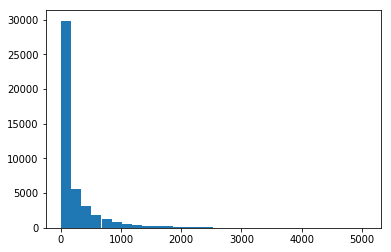

In [126]:
plt.hist(df['days_since_previous_release'].values, bins=30)

(array([2.5157e+04, 6.0750e+03, 3.2470e+03, 2.4790e+03, 1.5410e+03,
        1.2190e+03, 9.6900e+02, 8.3500e+02, 6.2000e+02, 5.0100e+02,
        4.1500e+02, 2.9200e+02, 2.6100e+02, 2.5000e+02, 1.5800e+02,
        1.1700e+02, 1.0700e+02, 1.1900e+02, 1.0100e+02, 8.6000e+01,
        7.7000e+01, 6.4000e+01, 4.3000e+01, 3.3000e+01, 3.8000e+01,
        2.6000e+01, 2.2000e+01, 2.5000e+01, 1.8000e+01, 1.2000e+01]),
 array([1.0000e+00, 1.0060e+02, 2.0020e+02, 2.9980e+02, 3.9940e+02,
        4.9900e+02, 5.9860e+02, 6.9820e+02, 7.9780e+02, 8.9740e+02,
        9.9700e+02, 1.0966e+03, 1.1962e+03, 1.2958e+03, 1.3954e+03,
        1.4950e+03, 1.5946e+03, 1.6942e+03, 1.7938e+03, 1.8934e+03,
        1.9930e+03, 2.0926e+03, 2.1922e+03, 2.2918e+03, 2.3914e+03,
        2.4910e+03, 2.5906e+03, 2.6902e+03, 2.7898e+03, 2.8894e+03,
        2.9890e+03]),
 <a list of 30 Patch objects>)

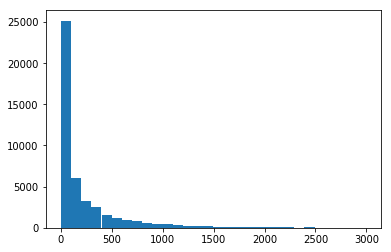

In [127]:
plt.hist(df[df['days_since_previous_release'] < 3000]['days_since_previous_release'].values, bins=30)

In [128]:
# df[df['days_since_previous_release'] == 1]

# Average days to release in N years

In [129]:
def average_days_to_release_in_last_n_years(album, n):
    album_release_date = album.release_date
    years_earlier = album_release_date - datetime.timedelta(days=n * 365)

    previous_albums = df[(df['release_date'] < album_release_date) & (df['release_date'] > years_earlier)]
    if len(previous_albums) == 0:
        return(None)
    else:
        return(previous_albums['days_until_next_album'].median())

In [130]:
def average_days_to_release_in_last_year(album):
    return(average_days_to_release_in_last_n_years(album, 1))

def average_days_to_release_in_last_2_years(album):
    return(average_days_to_release_in_last_n_years(album, 2))

def average_days_to_release_in_last_3_years(album):
    return(average_days_to_release_in_last_n_years(album, 3))

def average_days_to_release_in_last_5_years(album):
    return(average_days_to_release_in_last_n_years(album, 5))

In [131]:
# the first album from the artist
# average_days_to_release_in_last_year(first_album)

In [132]:
# the last album from the artist in our dataset
# average_days_to_release_in_last_year(last_album)

In [133]:
df.head(10).apply(average_days_to_release_in_last_year, axis=1)

id
77130752.0     76.0
77126682.0     98.0
9816130.0     102.0
1641895.0     137.0
1523930.0     137.0
40632261.0    161.0
301745.0      231.0
77133732.0    217.0
6141022.0     206.0
311650.0      189.0
dtype: float64

In [134]:
df['average_days_to_release_in_last_year'] = df.apply(average_days_to_release_in_last_year, axis=1)

In [135]:
df['average_days_to_release_in_last_2_years'] = df.apply(average_days_to_release_in_last_2_years, axis=1)

In [136]:
df['average_days_to_release_in_last_3_years'] = df.apply(average_days_to_release_in_last_3_years, axis=1)

In [137]:
df['average_days_to_release_in_last_5_years'] = df.apply(average_days_to_release_in_last_5_years, axis=1)

In [138]:
df.head()

,title,artist_name,artist_id,artist,release_date,record_type,nb_tracks,duration,genres,explicit_lyrics,...,albums_released_in_30_60_days,albums_released_in_60_90_days,albums_released_in_90_180_days,albums_released_in_180_360_days,albums_released_in_360_720_days,days_since_previous_release,average_days_to_release_in_last_year,average_days_to_release_in_last_2_years,average_days_to_release_in_last_3_years,average_days_to_release_in_last_5_years
id,,,,,,,,,,,,,,,,,,,,,
77130752.0,L'Everest (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2016-10-14,album,18.0,4177.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,0,0,0,0,0,420.0,76.0,85.0,91.0,104.0
77126682.0,Cosmopolitanie (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-08-21,album,28.0,6054.0,{u'data': [{u'picture': u'https://api.deezer.c...,True,...,0,0,0,0,0,158.0,98.0,104.5,109.0,119.0
9816130.0,Cosmopolitanie (Bonus Tracks),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-03-16,album,8.0,1753.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,0,0,0,0,0,1050.0,102.0,111.0,117.0,126.0
1641895.0,E=2MC's,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2012-04-30,album,12.0,3194.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,0,0,0,0,0,73.0,137.0,146.0,145.0,161.0
1523930.0,E.P. Live 2012,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2012-02-17,album,4.0,922.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,0,0,0,0,0,338.0,137.0,149.0,147.0,161.0


In [139]:
# df.plot(x='average_days_to_release_in_last_year', y='days_until_next_album', kind='scatter')

In [140]:
df.isnull().sum()

title                                       0
artist_name                                 0
artist_id                                   0
artist                                      0
release_date                                0
record_type                                 0
nb_tracks                                   0
duration                                    0
genres                                      0
explicit_lyrics                             0
days_since_first_release                    0
total_albums_released                       0
release_year                                0
release_month                               0
release_day_of_month                        0
release_day_of_week                         0
record_type_album                           0
record_type_single                          0
record_type_ep                              0
days_until_next_album                       0
albums_released_in_30_days                  0
albums_released_in_30_60_days     

In [141]:
df[df['average_days_to_release_in_last_year'].isnull()]['release_year'].unique()

array([2004])

Those releases are way too old. Let's just drop them

In [142]:
df = df.dropna(subset=['average_days_to_release_in_last_year'])
df.head()

,title,artist_name,artist_id,artist,release_date,record_type,nb_tracks,duration,genres,explicit_lyrics,...,albums_released_in_30_60_days,albums_released_in_60_90_days,albums_released_in_90_180_days,albums_released_in_180_360_days,albums_released_in_360_720_days,days_since_previous_release,average_days_to_release_in_last_year,average_days_to_release_in_last_2_years,average_days_to_release_in_last_3_years,average_days_to_release_in_last_5_years
id,,,,,,,,,,,,,,,,,,,,,
77130752.0,L'Everest (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2016-10-14,album,18.0,4177.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,0,0,0,0,0,420.0,76.0,85.0,91.0,104.0
77126682.0,Cosmopolitanie (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-08-21,album,28.0,6054.0,{u'data': [{u'picture': u'https://api.deezer.c...,True,...,0,0,0,0,0,158.0,98.0,104.5,109.0,119.0
9816130.0,Cosmopolitanie (Bonus Tracks),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-03-16,album,8.0,1753.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,0,0,0,0,0,1050.0,102.0,111.0,117.0,126.0
1641895.0,E=2MC's,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2012-04-30,album,12.0,3194.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,0,0,0,0,0,73.0,137.0,146.0,145.0,161.0
1523930.0,E.P. Live 2012,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2012-02-17,album,4.0,922.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,0,0,0,0,0,338.0,137.0,149.0,147.0,161.0


In [143]:
df.isnull().sum()

title                                      0
artist_name                                0
artist_id                                  0
artist                                     0
release_date                               0
record_type                                0
nb_tracks                                  0
duration                                   0
genres                                     0
explicit_lyrics                            0
days_since_first_release                   0
total_albums_released                      0
release_year                               0
release_month                              0
release_day_of_month                       0
release_day_of_week                        0
record_type_album                          0
record_type_single                         0
record_type_ep                             0
days_until_next_album                      0
albums_released_in_30_days                 0
albums_released_in_30_60_days              0
albums_rel

# Average days to release in last year for release type

In [144]:
def average_days_to_release_in_last_n_years_for_release_type(album, n):
    album_release_date = album.release_date
    record_type = album.record_type
    years_earlier = album_release_date - datetime.timedelta(days=n * 365)

    previous_albums = df[(df['record_type'] == record_type) & (df['release_date'] < album_release_date) & (df['release_date'] > years_earlier)]
    if len(previous_albums) == 0:
        return(None)
    else:
        return(previous_albums['days_until_next_album'].median())

In [145]:
# def average_days_to_release_in_last_n_years(album, n):
#     album_release_date = album.release_date
#     years_earlier = album_release_date - datetime.timedelta(days=n * 365)

#     previous_albums = df[(df['release_date'] < album_release_date) & (df['release_date'] > years_earlier)]
#     if len(previous_albums) == 0:
#         return(None)
#     else:
#         return(previous_albums['days_until_next_album'].median())

In [146]:
def average_days_to_release_in_last_year_for_release_type(album):
    return(average_days_to_release_in_last_n_years_for_release_type(album, 1))

def average_days_to_release_in_last_2_years_for_release_type(album):
    return(average_days_to_release_in_last_n_years_for_release_type(album, 2))

def average_days_to_release_in_last_3_years_for_release_type(album):
    return(average_days_to_release_in_last_n_years_for_release_type(album, 3))

def average_days_to_release_in_last_5_years_for_release_type(album):
    return(average_days_to_release_in_last_n_years_for_release_type(album, 5))

In [147]:
# the first album from the artist
# average_days_to_release_in_last_year_for_release_type(first_album)

In [148]:
# the last album from the artist in our dataset
# average_days_to_release_in_last_year_for_release_type(last_album)

In [149]:
df.head(10).apply(average_days_to_release_in_last_year_for_release_type, axis=1)

id
77130752.0    120.0
77126682.0    139.0
9816130.0     140.5
1641895.0     157.0
1523930.0     159.0
40632261.0    209.5
301745.0      283.0
77133732.0    277.5
6141022.0     259.0
311650.0      102.5
dtype: float64

In [150]:
df['average_days_to_release_in_last_year_for_release_type'] = df.apply(average_days_to_release_in_last_year_for_release_type, axis=1)

In [152]:
df['average_days_to_release_in_last_2_years_for_release_type'] = df.apply(average_days_to_release_in_last_2_years_for_release_type, axis=1)

KeyboardInterrupt: 

In [ ]:
df['average_days_to_release_in_last_3_years_for_release_type'] = df.apply(average_days_to_release_in_last_3_years_for_release_type, axis=1)

In [ ]:
df['average_days_to_release_in_last_5_years_for_release_type'] = df.apply(average_days_to_release_in_last_5_years_for_release_type, axis=1)

In [ ]:
# # Album
# album = df[df['record_type'] == 'album'].iloc[-1]
# average_days_to_release_in_last_year_for_release_type(album)

In [ ]:
# # EP
# ep = df[df['record_type'] == 'ep'].iloc[-1]
# ep
# average_days_to_release_in_last_year_for_release_type(ep)

In [ ]:
# # Single
# single = df[df['record_type'] == 'single'].iloc[-1]
# single
# average_days_to_release_in_last_year_for_release_type(first_album)

In [ ]:
df.head(10).apply(average_days_to_release_in_last_year_for_release_type, axis=1)

In [ ]:
# df['average_days_to_release_in_last_year_for_release_type'] = df.apply(average_days_to_release_in_last_year_for_release_type, axis=1)

In [ ]:
df.head()

In [ ]:
df.plot(x='average_days_to_release_in_last_year_for_release_type', y='days_until_next_album', kind='scatter')

In [ ]:
df.isnull().sum()

In [ ]:
df[df['average_days_to_release_in_last_year_for_release_type'].isnull()]['release_year'].unique()

In [ ]:
df = df.dropna(subset=['average_days_to_release_in_last_year_for_release_type'])
df.head()

In [ ]:
df.isnull().sum()

# Average artist days to release

In [153]:
# (df['days_since_first_release'] / df['total_albums_released']).head(10)

In [154]:
(df['days_since_first_release'] / df['total_albums_released']).round().head(10)

id
77130752.0    333.0
77126682.0    324.0
9816130.0     343.0
1641895.0     254.0
1523930.0     280.0
40632261.0    271.0
301745.0      181.0
77133732.0     68.0
6141022.0       0.0
311650.0      172.0
dtype: float64

In [155]:
df['average_days_to_release'] = (df['days_since_first_release'] / (df['total_albums_released'] - 1)).round()

In [156]:
df.head(10)

,title,artist_name,artist_id,artist,release_date,record_type,nb_tracks,duration,genres,explicit_lyrics,...,albums_released_in_90_180_days,albums_released_in_180_360_days,albums_released_in_360_720_days,days_since_previous_release,average_days_to_release_in_last_year,average_days_to_release_in_last_2_years,average_days_to_release_in_last_3_years,average_days_to_release_in_last_5_years,average_days_to_release_in_last_year_for_release_type,average_days_to_release
id,,,,,,,,,,,,,,,,,,,,,
77130752.0,L'Everest (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2016-10-14,album,18.0,4177.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,0,0,0,420.0,76.0,85.0,91.0,104.0,120.0,366.0
77126682.0,Cosmopolitanie (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-08-21,album,28.0,6054.0,{u'data': [{u'picture': u'https://api.deezer.c...,True,...,0,0,0,158.0,98.0,104.5,109.0,119.0,139.0,360.0
9816130.0,Cosmopolitanie (Bonus Tracks),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-03-16,album,8.0,1753.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,0,0,0,1050.0,102.0,111.0,117.0,126.0,140.5,386.0
1641895.0,E=2MC's,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2012-04-30,album,12.0,3194.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,0,0,0,73.0,137.0,146.0,145.0,161.0,157.0,291.0
1523930.0,E.P. Live 2012,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2012-02-17,album,4.0,922.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,0,0,0,338.0,137.0,149.0,147.0,161.0,159.0,327.0
40632261.0,La colombe et le corbeau,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2011-03-16,album,27.0,6591.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,0,0,0,682.0,161.0,154.0,157.0,175.0,209.5,325.0
301745.0,Live au Dôme de Marseille,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2008-03-28,album,14.0,3713.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,0,0,0,406.0,231.0,224.0,210.0,224.0,283.0,271.0
77133732.0,Puisqu'il faut vivre (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2007-02-16,album,20.0,4921.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,0,0,0,136.0,217.0,203.0,216.0,224.0,277.5,136.0
6141022.0,Psychanalyse,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2006-10-03,album,37.0,4517.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,0,0,0,91.0,206.0,198.5,221.0,221.0,259.0,NaN


# Fill missing `average_days_to_release`

In [157]:
average_days_to_release_median = df['average_days_to_release'].median()
average_days_to_release_median

302.0

In [158]:
df.loc[:,'average_days_to_release'].fillna(average_days_to_release_median, inplace=True)

In [159]:
df['average_days_to_release'].head()

id
77130752.0    366.0
77126682.0    360.0
9816130.0     386.0
1641895.0     291.0
1523930.0     327.0
Name: average_days_to_release, dtype: float64

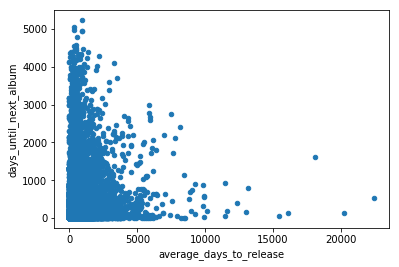

In [160]:
# df[['artist_id', 'release_year', 'average_days_to_release', 'days_until_next_album']].tail(50)
df.plot(x='average_days_to_release', y='days_until_next_album', kind='scatter')

# Min release frequency

In [161]:
def min_release_frequency(album):
    artist_id = album.artist_id
    artist_albums = df[df['artist_id'] == artist_id].sort_values('release_date')

    album_release_date = album.release_date
    albums_previously_released = artist_albums[artist_albums['release_date'] < album.release_date]
    if albums_previously_released.shape[0] > 0:
        return(albums_previously_released['days_until_next_album'].min())

In [162]:
df.head(10).apply(min_release_frequency, axis=1)

id
77130752.0     73.0
77126682.0     73.0
9816130.0      73.0
1641895.0      73.0
1523930.0     136.0
40632261.0    136.0
301745.0      136.0
77133732.0    136.0
6141022.0       NaN
311650.0      136.0
dtype: float64

In [163]:
df['min_release_frequency'] = df.apply(min_release_frequency, axis=1)

In [164]:
df.head()

,title,artist_name,artist_id,artist,release_date,record_type,nb_tracks,duration,genres,explicit_lyrics,...,albums_released_in_180_360_days,albums_released_in_360_720_days,days_since_previous_release,average_days_to_release_in_last_year,average_days_to_release_in_last_2_years,average_days_to_release_in_last_3_years,average_days_to_release_in_last_5_years,average_days_to_release_in_last_year_for_release_type,average_days_to_release,min_release_frequency
id,,,,,,,,,,,,,,,,,,,,,
77130752.0,L'Everest (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2016-10-14,album,18.0,4177.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,0,0,420.0,76.0,85.0,91.0,104.0,120.0,366.0,73.0
77126682.0,Cosmopolitanie (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-08-21,album,28.0,6054.0,{u'data': [{u'picture': u'https://api.deezer.c...,True,...,0,0,158.0,98.0,104.5,109.0,119.0,139.0,360.0,73.0
9816130.0,Cosmopolitanie (Bonus Tracks),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-03-16,album,8.0,1753.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,0,0,1050.0,102.0,111.0,117.0,126.0,140.5,386.0,73.0
1641895.0,E=2MC's,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2012-04-30,album,12.0,3194.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,0,0,73.0,137.0,146.0,145.0,161.0,157.0,291.0,73.0
1523930.0,E.P. Live 2012,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2012-02-17,album,4.0,922.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,0,0,338.0,137.0,149.0,147.0,161.0,159.0,327.0,136.0


In [165]:
min_release_frequency_median = df['min_release_frequency'].median()
min_release_frequency_median

8.0

In [166]:
df.loc[:,'min_release_frequency'].fillna(min_release_frequency_median, inplace=True)

# Max release frequency

In [167]:
def max_release_frequency(album):
    artist_id = album.artist_id
    artist_albums = df[df['artist_id'] == artist_id].sort_values('release_date')

    album_release_date = album.release_date
    albums_previously_released = artist_albums[artist_albums['release_date'] < album.release_date]
    if albums_previously_released.shape[0] > 0:
        return(albums_previously_released['days_until_next_album'].max())

In [168]:
df.head(10).apply(max_release_frequency, axis=1)

id
77130752.0    1050.0
77126682.0    1050.0
9816130.0     1050.0
1641895.0      682.0
1523930.0      682.0
40632261.0     682.0
301745.0       406.0
77133732.0     136.0
6141022.0        NaN
311650.0       406.0
dtype: float64

In [169]:
df['max_release_frequency'] = df.apply(max_release_frequency, axis=1)

In [170]:
df.head()

,title,artist_name,artist_id,artist,release_date,record_type,nb_tracks,duration,genres,explicit_lyrics,...,albums_released_in_360_720_days,days_since_previous_release,average_days_to_release_in_last_year,average_days_to_release_in_last_2_years,average_days_to_release_in_last_3_years,average_days_to_release_in_last_5_years,average_days_to_release_in_last_year_for_release_type,average_days_to_release,min_release_frequency,max_release_frequency
id,,,,,,,,,,,,,,,,,,,,,
77130752.0,L'Everest (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2016-10-14,album,18.0,4177.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,0,420.0,76.0,85.0,91.0,104.0,120.0,366.0,73.0,1050.0
77126682.0,Cosmopolitanie (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-08-21,album,28.0,6054.0,{u'data': [{u'picture': u'https://api.deezer.c...,True,...,0,158.0,98.0,104.5,109.0,119.0,139.0,360.0,73.0,1050.0
9816130.0,Cosmopolitanie (Bonus Tracks),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-03-16,album,8.0,1753.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,0,1050.0,102.0,111.0,117.0,126.0,140.5,386.0,73.0,1050.0
1641895.0,E=2MC's,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2012-04-30,album,12.0,3194.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,0,73.0,137.0,146.0,145.0,161.0,157.0,291.0,73.0,682.0
1523930.0,E.P. Live 2012,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2012-02-17,album,4.0,922.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,0,338.0,137.0,149.0,147.0,161.0,159.0,327.0,136.0,682.0


In [171]:
max_release_frequency_median = df['max_release_frequency'].median()
max_release_frequency_median

816.0

In [172]:
df.loc[:,'max_release_frequency'].fillna(max_release_frequency_median, inplace=True)

# Average release frequency for release type

In [173]:
def average_release_frequency_for_release_type(album):
    artist_id = album.artist_id
    artist_albums = df[df['artist_id'] == artist_id].sort_values('release_date')

    album_release_date = album.release_date
    albums_previously_released = artist_albums[artist_albums['release_date'] < album.release_date]
    releases_with_this_type = albums_previously_released[albums_previously_released['record_type'] == album.record_type]
    if albums_previously_released.shape[0] > 0:
        return(albums_previously_released['days_until_next_album'].max())

In [174]:
df.head(10).apply(average_release_frequency_for_release_type, axis=1)

id
77130752.0    1050.0
77126682.0    1050.0
9816130.0     1050.0
1641895.0      682.0
1523930.0      682.0
40632261.0     682.0
301745.0       406.0
77133732.0     136.0
6141022.0        NaN
311650.0       406.0
dtype: float64

In [175]:
df['average_release_frequency_for_release_type'] = df.apply(average_release_frequency_for_release_type, axis=1)

In [176]:
df.head()

,title,artist_name,artist_id,artist,release_date,record_type,nb_tracks,duration,genres,explicit_lyrics,...,days_since_previous_release,average_days_to_release_in_last_year,average_days_to_release_in_last_2_years,average_days_to_release_in_last_3_years,average_days_to_release_in_last_5_years,average_days_to_release_in_last_year_for_release_type,average_days_to_release,min_release_frequency,max_release_frequency,average_release_frequency_for_release_type
id,,,,,,,,,,,,,,,,,,,,,
77130752.0,L'Everest (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2016-10-14,album,18.0,4177.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,420.0,76.0,85.0,91.0,104.0,120.0,366.0,73.0,1050.0,1050.0
77126682.0,Cosmopolitanie (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-08-21,album,28.0,6054.0,{u'data': [{u'picture': u'https://api.deezer.c...,True,...,158.0,98.0,104.5,109.0,119.0,139.0,360.0,73.0,1050.0,1050.0
9816130.0,Cosmopolitanie (Bonus Tracks),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-03-16,album,8.0,1753.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,1050.0,102.0,111.0,117.0,126.0,140.5,386.0,73.0,1050.0,1050.0
1641895.0,E=2MC's,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2012-04-30,album,12.0,3194.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,73.0,137.0,146.0,145.0,161.0,157.0,291.0,73.0,682.0,682.0
1523930.0,E.P. Live 2012,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2012-02-17,album,4.0,922.0,{u'data': [{u'picture': u'https://api.deezer.c...,False,...,338.0,137.0,149.0,147.0,161.0,159.0,327.0,136.0,682.0,682.0


In [177]:
average_release_frequency_for_release_type_median = df['average_release_frequency_for_release_type'].median()
average_release_frequency_for_release_type_median

816.0

In [178]:
df.loc[:,'average_release_frequency_for_release_type'].fillna(average_release_frequency_for_release_type_median, inplace=True)

# Genres

In [179]:
# df['genres'].head()

## Parse JSON

In [180]:
# genre = df['genres'].iloc[0]
# genre

In [181]:
# genre = genre.replace("u'", '"').replace("'", '"')

In [182]:
# genre_json = json.loads(genre)
# genre_json

In [183]:
# genre_json['data'][0]['name']

In [184]:
# df['genres'].head().apply(replace_quotes)

In [185]:
# df['genres'].head().apply(replace_quotes).apply(json.loads)

In [186]:
def genre_names(genres_json):
    return([genre['name'] for genre in genres_json['data']])
# genre_names(genre_json)

In [187]:
# df['genres'].head().apply(replace_quotes).apply(json.loads).apply(genre_names)

In [188]:
genres = df['genres'].apply(replace_quotes).apply(json.loads).apply(genre_names)
genres.head(10)

id
77130752.0         [Rap/Hip Hop]
77126682.0         [Rap/Hip Hop]
9816130.0          [Rap/Hip Hop]
1641895.0          [Rap/Hip Hop]
1523930.0          [Rap/Hip Hop]
40632261.0         [Rap/Hip Hop]
301745.0      [Rap/Hip Hop, Pop]
77133732.0         [Rap/Hip Hop]
6141022.0          [Rap/Hip Hop]
311650.0      [Rap/Hip Hop, Pop]
Name: genres, dtype: object

In [189]:
# how much genres do we have?
flatten = lambda l: [item for sublist in l for item in sublist]
len(set(flatten(list(genres))))

71

In [190]:
# what genres are there?
unique_genres = set(flatten(list(genres)))
unique_genres

{u'Acoustic Blues',
 u'African Music',
 u'Alternative',
 u'Asian Music',
 u'Blues',
 u'Bolero',
 u'Bollywood',
 u'Brazilian Music',
 u'Chicago Blues',
 u'Chill Out/Trip-Hop/Lounge',
 u'Classical',
 u'Classical Period',
 u'Comedy',
 u'Contemporary R&B',
 u'Contemporary Soul',
 u'Country Blues',
 u'Dance',
 u'Dancefloor',
 u'Dancehall/Ragga',
 u'Dirty South',
 u'Disco',
 u'Dub',
 u'Dubstep',
 u'East Coast',
 u'Electro',
 u'Electro Hip Hop',
 u'Electro Pop/Electro Rock',
 u'Film Scores',
 u'Films/Games',
 u'Folk',
 u'Game Scores',
 u'Grime',
 u'Hard Rock',
 u'Indian Music',
 u'Indie Pop',
 u'Indie Pop/Folk',
 u'Indie Rock',
 u'Indie Rock/Rock pop',
 u'Instrumental jazz',
 u'International Pop',
 u'Jazz',
 u'Jazz Hip Hop',
 u'Kids',
 u'Latin Music',
 u'Metal',
 u'Modern',
 u'Musicals',
 u'Norte\xf1o',
 u'Nursery Rhymes',
 u'Old School',
 u'Old school soul',
 u'Oldschool R&B',
 u'Opera',
 u'Pop',
 u'R&B',
 u'Ranchera',
 u'Rap/Hip Hop',
 u'Reggae',
 u'Rock',
 u'Rock & Roll/Rockabilly',
 u'Sin

In [191]:
genres.head()

id
77130752.0    [Rap/Hip Hop]
77126682.0    [Rap/Hip Hop]
9816130.0     [Rap/Hip Hop]
1641895.0     [Rap/Hip Hop]
1523930.0     [Rap/Hip Hop]
Name: genres, dtype: object

In [192]:
# genre = 'Rock'
# genres.head().apply(lambda x:  genre in x)

In [193]:
# for genre in unique_genres:
#     df['genre_' + genre] = (genres.apply(lambda x:  genre in x)).astype(int)
    
# df.head()

# Convert Explicit lyrics to int

In [194]:
df['explicit_lyrics'] = df['explicit_lyrics'].astype(int)
df.head()

,title,artist_name,artist_id,artist,release_date,record_type,nb_tracks,duration,genres,explicit_lyrics,...,days_since_previous_release,average_days_to_release_in_last_year,average_days_to_release_in_last_2_years,average_days_to_release_in_last_3_years,average_days_to_release_in_last_5_years,average_days_to_release_in_last_year_for_release_type,average_days_to_release,min_release_frequency,max_release_frequency,average_release_frequency_for_release_type
id,,,,,,,,,,,,,,,,,,,,,
77130752.0,L'Everest (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2016-10-14,album,18.0,4177.0,{u'data': [{u'picture': u'https://api.deezer.c...,0,...,420.0,76.0,85.0,91.0,104.0,120.0,366.0,73.0,1050.0,1050.0
77126682.0,Cosmopolitanie (Deluxe Edition),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-08-21,album,28.0,6054.0,{u'data': [{u'picture': u'https://api.deezer.c...,1,...,158.0,98.0,104.5,109.0,119.0,139.0,360.0,73.0,1050.0,1050.0
9816130.0,Cosmopolitanie (Bonus Tracks),Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2015-03-16,album,8.0,1753.0,{u'data': [{u'picture': u'https://api.deezer.c...,0,...,1050.0,102.0,111.0,117.0,126.0,140.5,386.0,73.0,1050.0,1050.0
1641895.0,E=2MC's,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2012-04-30,album,12.0,3194.0,{u'data': [{u'picture': u'https://api.deezer.c...,0,...,73.0,137.0,146.0,145.0,161.0,157.0,291.0,73.0,682.0,682.0
1523930.0,E.P. Live 2012,Soprano,13011,{u'picture': u'https://api.deezer.com/artist/1...,2012-02-17,album,4.0,922.0,{u'data': [{u'picture': u'https://api.deezer.c...,0,...,338.0,137.0,149.0,147.0,161.0,159.0,327.0,136.0,682.0,682.0


# Drop old releases  
That we've used in last year features

In [195]:
df.shape

(44951, 36)

In [196]:
df[pd.to_datetime(df['release_date']).dt.year >= 2012].shape

(27755, 36)

In [197]:
df = df[pd.to_datetime(df['release_date']).dt.year >= 2012]
df.shape

(27755, 36)

# Drop already used columns

In [198]:
df.dtypes[df.dtypes == 'object']

title           object
artist_name     object
artist          object
release_date    object
record_type     object
genres          object
dtype: object

In [199]:
df.shape

(27755, 36)

In [200]:
df.drop(df.dtypes[df.dtypes == 'object'].index.values, axis=1, inplace=True)
df.shape

/usr/local/lib/python2.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(27755, 30)

# Final missing values check

In [201]:
df.isnull().sum().sum()

0

# Feature correlations

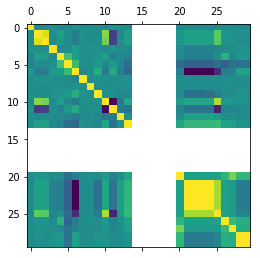

In [202]:
plt.matshow(df.corr())
plt.show()

In [203]:
corr = df.corr()
corr[(corr['days_until_next_album'] > 0.2) | (corr['days_until_next_album'] < -0.2)]['days_until_next_album']

total_albums_released                                   -0.259793
release_year                                            -0.324509
record_type_album                                        0.204751
record_type_single                                      -0.215425
days_until_next_album                                    1.000000
days_since_previous_release                              0.208429
average_days_to_release_in_last_year                     0.321937
average_days_to_release_in_last_2_years                  0.323995
average_days_to_release_in_last_3_years                  0.324007
average_days_to_release_in_last_5_years                  0.325342
average_days_to_release_in_last_year_for_release_type    0.343353
Name: days_until_next_album, dtype: float64

# Save the dataset

In [204]:
df.shape

(27755, 30)

In [205]:
df.to_csv('dataset.csv', encoding='utf-8')